In [2]:
import glob
import pandas as pd
from dbfread import DBF
# read in ROI dbf
Input_Raster_dir = 'D:/Box Sync/research/Leslie/Classification_sUAS/'
Files = glob.glob(Input_Raster_dir + '/**/Training*.dbf', recursive=True)
# Set the output dir
Output_dir = 'D:/Box Sync/research/Leslie/Classification_sUAS/Results'

In [3]:
# Read in training data table and display first 5 rows
features = pd.DataFrame()#creates a new dataframe that's empty
for file in Files:
    table = DBF(file)
    features_temp = pd.DataFrame(iter(table))
    features_temp.columns = ['Id','Class','ClassID','Blue','Green','Red','NIR','Rededge','VegHeight','NDVI_April','NDVI_May','NDVI_June','sUAS_NDVI']
    features = pd.concat([features, features_temp])

In [4]:
print('The shape of our features is:', features.shape)

The shape of our features is: (6014, 13)


In [5]:
# Descriptive statistics for each column
features.describe()

,Id,ClassID,Blue,Green,Red,NIR,Rededge,VegHeight,NDVI_April,NDVI_May,NDVI_June,sUAS_NDVI
count,6014.0,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000
mean,0.0,4.091952,0.056439,0.080925,0.083267,0.146810,0.190996,1.269276,0.271702,0.335083,0.307196,0.409126
std,0.0,1.905560,0.025642,0.033232,0.059018,0.059349,0.106815,2.639982,0.081154,0.104277,0.091271,0.211000
min,0.0,1.000000,0.009994,0.012880,0.002409,0.024032,0.007570,-0.650112,0.053282,0.129714,0.124121,-0.057933
25%,0.0,3.000000,0.039164,0.063471,0.026308,0.114436,0.107117,0.003886,0.210890,0.257341,0.236457,0.223844
50%,0.0,4.000000,0.053345,0.081959,0.077631,0.150257,0.200437,0.036269,0.248234,0.309466,0.288068,0.403946
75%,0.0,6.000000,0.072944,0.100389,0.126918,0.183214,0.277415,0.513027,0.331806,0.412376,0.372959,0.602272
max,0.0,7.000000,0.163086,0.218475,0.326172,0.392057,0.458795,25.400200,0.540891,0.649087,0.616964,0.864393


In [6]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['ClassID'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Class', axis = 1)
#features= features.drop('FID', axis = 1)
features= features.drop('ClassID', axis = 1)
features= features.drop('Id', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
print(features)
features = np.array(features)

         Blue     Green       Red       NIR   Rededge  VegHeight  NDVI_April  \
0    0.091952  0.106185  0.143937  0.157177  0.192628   0.126385    0.228142   
1    0.087162  0.095235  0.122546  0.136576  0.171924   0.850425    0.226555   
2    0.093574  0.101496  0.128537  0.140148  0.174513   1.065720    0.226926   
3    0.111606  0.118697  0.152314  0.166813  0.197587   0.687303    0.226372   
4    0.046005  0.058446  0.076165  0.093235  0.136567   0.626777    0.229995   
5    0.046587  0.054017  0.076584  0.091399  0.142014   0.033571    0.250942   
6    0.056383  0.065289  0.096215  0.112271  0.157856   0.011269    0.249963   
7    0.067594  0.078522  0.104881  0.116195  0.160354   0.040925    0.252883   
8    0.064289  0.072396  0.104702  0.123317  0.165908   0.078159    0.257092   
9    0.086794  0.099210  0.134296  0.150704  0.186256   0.025253    0.229462   
10   0.090335  0.107933  0.150371  0.161399  0.197377   0.068544    0.226694   
11   0.077091  0.077849  0.114429  0.128

In [7]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 40)

In [8]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4510, 10)
Training Labels Shape: (4510,)
Testing Features Shape: (1504, 10)
Testing Labels Shape: (1504,)


In [9]:
from sklearn import model_selection
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

C:\Users\GraceLiu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GraceLiu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn
y = sklearn.preprocessing.label_binarize(labels, classes=[1, 2, 3, 4, 5])
X = features
#rfc_cv_score = cross_val_score(rfc,X, y, cv=2, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
# print("=== All AUC Scores ===")
# print(rfc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=rfc.oob_score_ * 100))

=== Confusion Matrix ===
[[170   4   5   0   0   3   0]
 [  6 149   7   3   1  13   1]
 [  4   0 268   2   0   0   0]
 [  0   3   2 188   0   4   3]
 [  0   0   0   0 274   1   3]
 [  6   8   2   3   0 149   1]
 [  2   4   0   7   1   2 205]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.90      0.93      0.92       182
          2       0.89      0.83      0.86       180
          3       0.94      0.98      0.96       274
          4       0.93      0.94      0.93       200
          5       0.99      0.99      0.99       278
          6       0.87      0.88      0.87       169
          7       0.96      0.93      0.94       221

avg / total       0.93      0.93      0.93      1504



Our OOB prediction of accuracy is: 89.95565410199556%


In [11]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.9min finished


{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 260}


In [14]:
rfc = RandomForestClassifier(n_estimators = 1400,#rfc_random.best_params_['n_estimators'],
                             max_features = 'auto',#rfc_random.best_params_['max_features'],
                             max_depth = 260,#rfc_random.best_params_['max_depth'],
                             oob_score=True)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict_train = rfc.predict(X_train)
print("=== Confusion Matrix (test) ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Confusion Matrix (train) ===")
print(confusion_matrix(y_train, rfc_predict_train))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=rfc.oob_score_ * 100))

=== Confusion Matrix (test) ===
[[172   3   4   0   0   3   0]
 [  4 154   4   4   1  12   1]
 [  1   1 270   2   0   0   0]
 [  0   3   1 188   1   4   3]
 [  0   0   0   0 275   1   2]
 [  5   9   0   3   0 151   1]
 [  0   4   1   4   1   3 208]]


=== Confusion Matrix (train) ===
[[511   0   0   0   0   0   0]
 [  0 514   0   0   0   0   0]
 [  0   0 841   0   0   0   0]
 [  0   0   0 617   0   0   0]
 [  0   0   0   0 848   0   0]
 [  0   0   0   0   0 529   0]
 [  0   0   0   0   0   0 650]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.95      0.95      0.95       182
          2       0.89      0.86      0.87       180
          3       0.96      0.99      0.97       274
          4       0.94      0.94      0.94       200
          5       0.99      0.99      0.99       278
          6       0.87      0.89      0.88       169
          7       0.97      0.94      0.95       221

avg / total       0.94      0.94      0

In [15]:
# Fit the model
rfc_random.fit(features, labels)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.5min finished


{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 300}


In [16]:
rfc_full = RandomForestClassifier(n_estimators = 2000,#rfc_random.best_params_['n_estimators'],
                                  max_features ='auto',# rfc_random.best_params_['max_features'],
                                  max_depth = 300,#rfc_random.best_params_['max_depth'],
                                  oob_score=True)
rfc_full.fit(features,labels)
print('Our OOB prediction of accuracy for the full model is: {oob}%'.format(oob=rfc_full.oob_score_ * 100))

Our OOB prediction of accuracy for the full model is: 95.12803458596608%


In [15]:
import os
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'Tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('Tree.dot')
# Write graph to a png file
graph.write_png(os.path.join(Output_dir,'Tree.tif'))

In [19]:
# Pull out one tree from the full forest
tree = rfc_full.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfc_full.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'Tree_full.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('Tree_full.dot')
# Write graph to a png file
graph.write_png(os.path.join(Output_dir,'Tree_full.png'))

In [17]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: VegHeight            Importance: 0.2
Variable: sUAS_NDVI            Importance: 0.14
Variable: NIR                  Importance: 0.12
Variable: Red                  Importance: 0.09
Variable: NDVI_May             Importance: 0.09
Variable: Blue                 Importance: 0.08
Variable: Green                Importance: 0.08
Variable: NDVI_April           Importance: 0.08
Variable: Rededge              Importance: 0.07
Variable: NDVI_June            Importance: 0.05


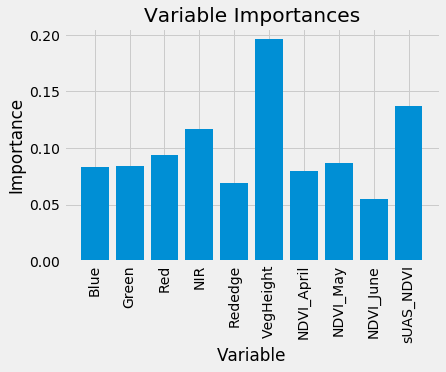

In [18]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [26]:
# # saving full model
# from sklearn.externals import joblib
# # Save to file in the current working directory
# joblib_file = os.path.join(Output_dir,'RFmodel_10b_full.pickle')
# joblib.dump(rfc_full, joblib_file)

# # Load from file
# joblib_model = joblib.load(joblib_file)

# # Calculate the accuracy and predictions
# score = joblib_model.score(X_test, y_test)  
# print("Test score: {0:.2f} %".format(100 * score))  

Test score: 100.00 %


In [20]:
# saving full model using pickle
import os
import pickle
# Save to file in the current working directory
pkl_filename = os.path.join(Output_dir,'RFmodel_10b_full_V2.pickle')
with open(pkl_filename, 'wb') as file:  
    pickle.dump(rfc_full, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:  
#     pickle_model = pickle.load(file)

# # Calculate the accuracy score and predict target values
# score = pickle_model.score(X_test, y_test)  
# print("Test score: {0:.2f} %".format(100 * score))   

In [21]:
# Predicting the rest of the image
from osgeo import gdal, gdal_array
import osr
def raster2array(rasterfn,i):
    raster = gdal.Open(rasterfn)
    band = raster.GetRasterBand(i)
    return band.ReadAsArray()
def array2raster(rasterfn,newRasterfn,array):
    raster = gdal.Open(rasterfn)
    geotransform = raster.GetGeoTransform()
    originX = geotransform[0]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    pixelHeight = geotransform[5]
    cols = raster.RasterXSize
    rows = raster.RasterYSize
    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Float32)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromWkt(raster.GetProjectionRef())
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    


In [22]:
# Read in training data table and display first 5 rows
#Sites = ['Rush_Fire']#,'Ashley_Fire','Blue_Door_Fire','Blue_Fire','Horse_Fire_North','Horse_Fire_South','Horse_Lake_Fire','Nelson_Fire','Scorpion_Fire']        
Files = glob.glob(Input_Raster_dir + '/**/Input_*.tif', recursive=True)
for file in Files:
    print('working on ' + file )
    site = os.path.basename(file)[6:-4]
    img_ds = gdal.Open(file, gdal.GA_ReadOnly)
    img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
                   gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))
    for i in np.arange(img_ds.RasterCount):
        img[:,:,i] = raster2array(file,int(i)+1)
    # Take our full image, ignore the Fmask band, and reshape into long 2d array (nrow * ncol, nband) for classification
    new_shape = (img.shape[0] * img.shape[1], img.shape[2])
    img_as_array = img[:, :, :].reshape(new_shape)
    print('Reshaped from {o} to {n}'.format(o=img.shape,
                                            n=img_as_array.shape))
    # Now predict for each pixel
    class_prediction = rfc_full.predict(img_as_array)
    # Reshape our classification map
    class_prediction = class_prediction.reshape(img[:, :, 0].shape)
    # Set example dir for meta data
    Example_dir = glob.glob(os.path.join(Input_Raster_dir,site,'Raster','I_Cliped','*Multispectral_NDVI.tif'))[0]
    # Set the output dir
    Classification_dir = os.path.join(Input_Raster_dir,site,'Raster','III_Classification')
    if not os.path.exists(Classification_dir):
        os.makedirs(Classification_dir)
    array2raster(Example_dir,
                os.path.join(Classification_dir,site+'_RFClass_V2.tif'),
                class_prediction)

working on D:/Box Sync/research/Leslie/Classification_sUAS\Ashley_Fire\Raster\II_StackedInput\Input_Ashley_Fire.tif
Reshaped from (5491, 6673, 10) to (36641443, 10)


C:\Users\GraceLiu\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on D:/Box Sync/research/Leslie/Classification_sUAS\Blue_Door_Fire\Raster\II_StackedInput\Input_Blue_Door_Fire.tif
Reshaped from (5577, 4548, 10) to (25364196, 10)
working on D:/Box Sync/research/Leslie/Classification_sUAS\Blue_Fire\Raster\II_StackedInput\Input_Blue_Fire.tif
Reshaped from (4084, 5653, 10) to (23086852, 10)
working on D:/Box Sync/research/Leslie/Classification_sUAS\Horse_Fire_North\Raster\II_StackedInput\Input_Horse_Fire_North.tif
Reshaped from (5840, 7601, 10) to (44389840, 10)
working on D:/Box Sync/research/Leslie/Classification_sUAS\Horse_Fire_South\Raster\II_StackedInput\Input_Horse_Fire_South.tif
Reshaped from (5932, 7105, 10) to (42146860, 10)
working on D:/Box Sync/research/Leslie/Classification_sUAS\Horse_Lake_Fire\Raster\II_StackedInput\Input_Horse_Lake_Fire.tif
Reshaped from (6758, 4244, 10) to (28680952, 10)
working on D:/Box Sync/research/Leslie/Classification_sUAS\Nelson_Fire\Raster\II_StackedInput\Input_Nelson_Fire.tif
Reshaped from (6805, 6375, 10

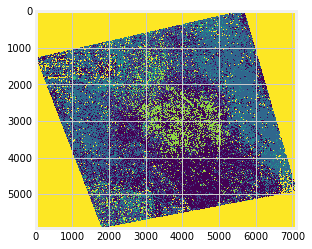

In [23]:
## visiualization
# plt.imshow(class_prediction, interpolation='none')
# plt.show()